In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    classification_report, roc_auc_score, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Scale data:

MinMaxScaler (normalization) scales your data to a specific range, typically [0, 1] or [-1, 1]. 
It's useful when you want to constrain the features within a specific range and when you don't want to 
assume a normal distribution of the data. This is a good choice when the absolute values and the relative 
relationships between your features are important.

In [2]:
# Define the data types as a dictionary
dtypes = {
    'census_tract': 'float32',
    'action_taken': 'int32',
    'loan_type': 'int32',
    'lien_status': 'int32',
    'reverse_mortgage': 'int32',
    'open_end_line_of_credit': 'int32',
    'loan_amount': 'int32',
    'combined_loan_to_value_ratio': 'int32',
    'interest_rate': 'float32',
    'total_loan_costs': 'int32',
    'origination_charges': 'int32',
    'loan_term': 'int32',
    'negative_amortization': 'int32',
    'interest_only_payment': 'int32',
    'balloon_payment': 'int32',
    'other_nonamortizing_features': 'int32',
    'property_value': 'float32',
    'occupancy_type': 'int32',
    'manufactured_home_secured_property_type': 'int32',
    'manufactured_home_land_property_interest': 'int32',
    'total_units': 'int32',
    'income': 'float32',
    'debt_to_income_ratio': 'int32',
    'applicant_credit_score_type': 'int32',
    'co_applicant_credit_score_type': 'int32',
    'applicant_sex': 'int32',
    'co_applicant_sex': 'int32',
    'applicant_age': 'int32',
    'co_applicant_age': 'int32',
    'aus_1': 'int32',
    'applicant_race_1': 'float32',
    'applicant_race_2': 'float32',
    'co_applicant_race_1': 'float32',
    'co_applicant_race_2': 'float32',
    'applicant_ethnicity_1': 'float32',
    'co_applicant_ethnicity_1': 'float32'
}

In [3]:
# Read the CSV file with specified data types
df = pd.read_csv('10_all_numerical_32bit.csv', dtype=dtypes, low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148621 entries, 0 to 148620
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              148621 non-null  float32
 1   action_taken                              148621 non-null  int32  
 2   loan_type                                 148621 non-null  int32  
 3   lien_status                               148621 non-null  int32  
 4   reverse_mortgage                          148621 non-null  int32  
 5   open_end_line_of_credit                   148621 non-null  int32  
 6   loan_amount                               148621 non-null  int32  
 7   combined_loan_to_value_ratio              148621 non-null  int32  
 8   interest_rate                             148621 non-null  float32
 9   total_loan_costs                          148621 non-null  int32  
 10  origination_charges 

# Scale data between 1 and 0

In [5]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [6]:
df.to_csv('final_dataset.csv', index=False)

# Correlations

In [7]:
df.corr()

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
census_tract,1.000000,0.013724,0.021427,0.005715,NaN,0.003166,-0.162781,-0.055863,0.043115,0.000067,...,0.018515,-0.037813,0.009116,-0.048391,-0.012495,-0.005040,-0.006999,-0.003911,0.053474,0.045278
action_taken,0.013724,1.000000,0.011502,0.044558,NaN,-0.034270,-0.097737,0.102058,-0.186579,-0.129834,...,0.121087,0.084320,0.141446,0.585696,-0.128596,-0.013217,-0.049226,-0.006216,-0.091525,-0.035521
loan_type,0.021427,0.011502,1.000000,-0.020707,NaN,0.009378,-0.085059,0.001637,0.001028,0.155589,...,0.038510,0.013493,0.036933,-0.042105,-0.032758,-0.002445,-0.011541,-0.001471,0.002948,-0.004810
lien_status,0.005715,0.044558,-0.020707,1.000000,NaN,-0.358394,-0.064013,0.078813,0.031669,-0.010075,...,0.005041,-0.013343,0.004468,0.094059,-0.021798,0.002955,-0.008190,0.001297,-0.036881,-0.020115
reverse_mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_end_line_of_credit,0.003166,-0.034270,0.009378,-0.358394,NaN,1.000000,0.022402,0.001364,0.006394,0.004449,...,-0.011441,-0.000148,-0.008833,-0.037293,0.007214,-0.001208,0.001693,-0.000530,0.020475,0.000169
loan_amount,-0.162781,-0.097737,-0.085059,-0.064013,NaN,0.022402,1.000000,-0.058693,-0.244461,0.112338,...,-0.119277,-0.067954,-0.154420,0.169007,0.098234,0.010359,0.031958,-0.000663,0.097043,0.034541
combined_loan_to_value_ratio,-0.055863,0.102058,0.001637,0.078813,NaN,0.001364,-0.058693,1.000000,-0.063047,-0.065843,...,0.030439,0.162841,0.077201,0.068726,-0.007321,-0.000746,0.003367,0.000626,-0.033507,-0.014813
interest_rate,0.043115,-0.186579,0.001028,0.031669,NaN,0.006394,-0.244461,-0.063047,1.000000,-0.073408,...,0.035880,0.032778,0.056295,-0.339400,-0.016761,-0.001194,-0.009349,-0.001471,-0.040928,-0.023244
total_loan_costs,0.000067,-0.129834,0.155589,-0.010075,NaN,0.004449,0.112338,-0.065843,-0.073408,1.000000,...,-0.022885,-0.062172,-0.044570,0.015468,0.016223,0.001897,0.002541,-0.000402,0.012381,0.002942


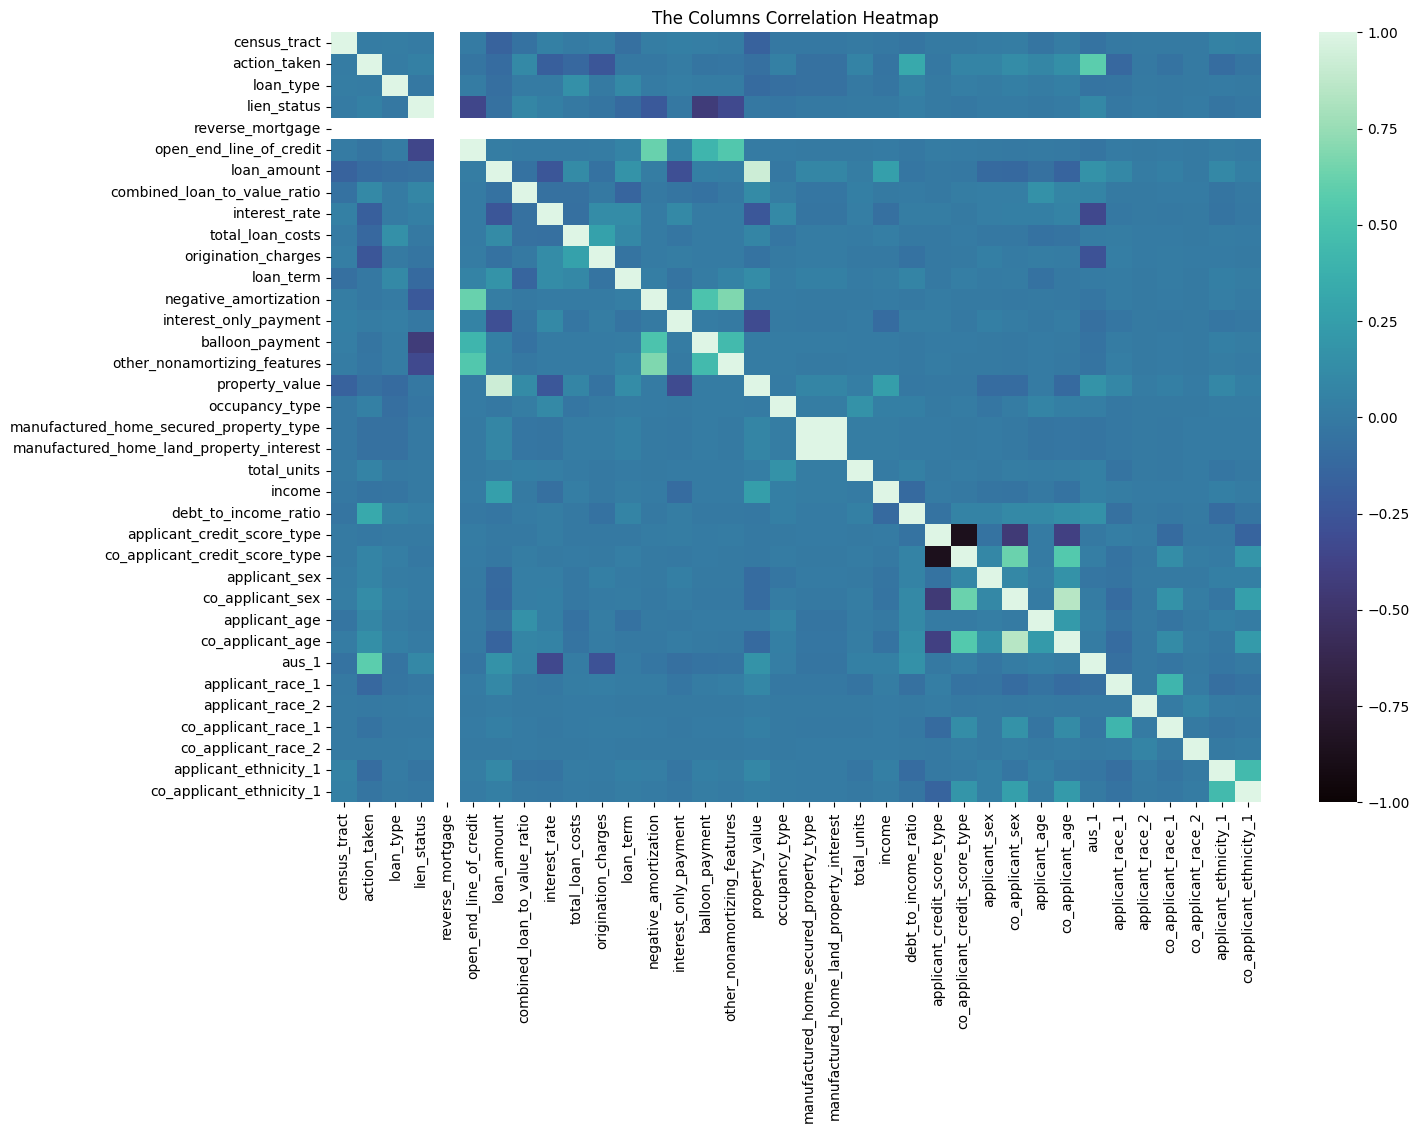

In [12]:
plt.figure(figsize=(15,10))
plt.title('The Columns Correlation Heatmap')
sns.heatmap(df.corr(),cmap='mako', annot=False, vmin=-1, vmax=1);

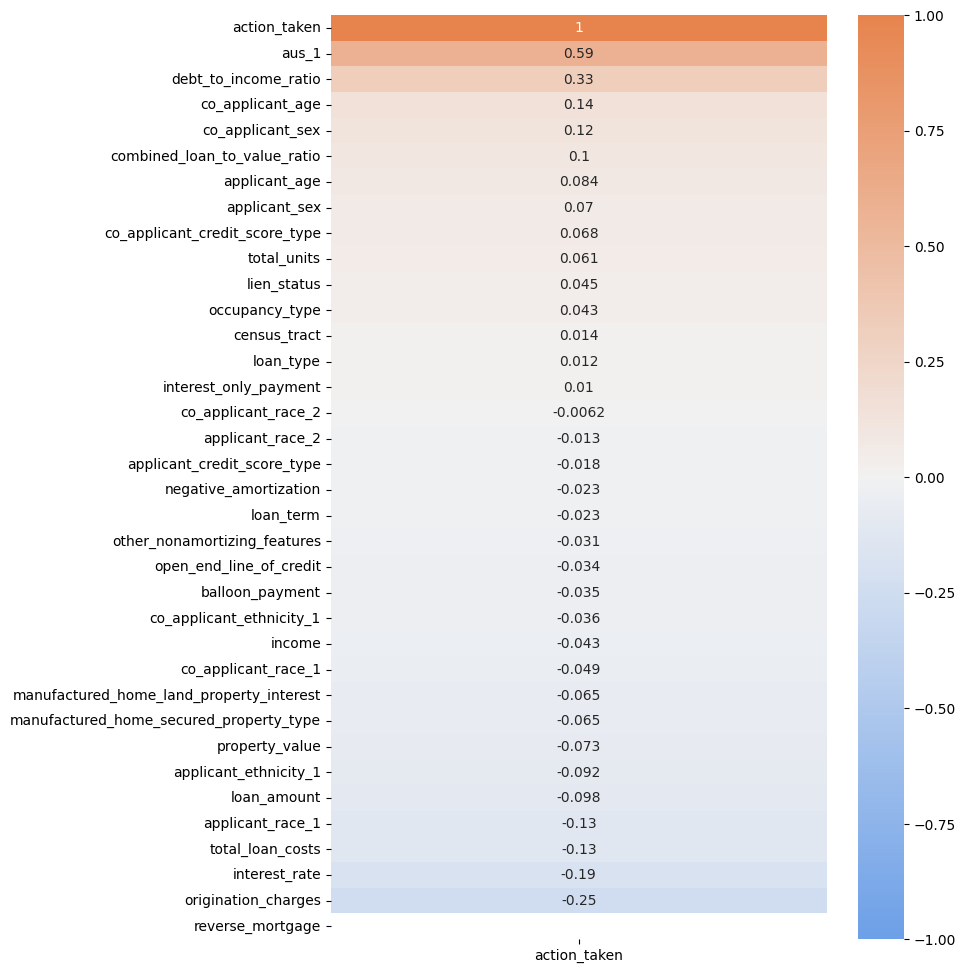

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['action_taken']].sort_values(by='action_taken', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(250, 30, l=65, as_cmap=True))

In [ ]:
sns.pairplot(df, hue = 'action_taken');

KeyboardInterrupt: 

# Create X and y

In [7]:
X = df_scaled.drop('action_taken', axis=1)
y = df_scaled['action_taken']

In [8]:
X

,census_tract,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
0,0.112671,0.333333,0.0,0.0,1.0,0.003901,0.1250,0.4,0.235294,0.142857,...,0.8,0.142857,0.75,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.577495,0.666667,0.0,0.0,1.0,0.007092,0.9375,0.4,0.235294,0.142857,...,0.2,1.000000,0.50,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.464855,0.000000,0.0,0.0,1.0,0.007092,0.3750,0.4,0.235294,0.142857,...,0.8,0.142857,0.75,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,0.071300,0.000000,0.0,0.0,1.0,0.005319,0.4375,0.4,0.235294,0.142857,...,0.8,0.571429,0.75,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.508531,0.000000,0.0,0.0,1.0,0.008865,0.1875,0.4,0.235294,0.142857,...,0.8,0.428571,0.75,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148616,0.423912,0.000000,0.0,0.0,1.0,0.004610,0.0000,0.6,0.235294,0.285714,...,0.8,0.571429,0.75,0.8,1.0,1.0,1.0,1.0,1.0,1.0
148617,0.353741,0.000000,0.0,0.0,1.0,0.027305,0.1875,0.4,0.058824,0.000000,...,0.0,0.142857,0.25,0.8,1.0,1.0,1.0,1.0,1.0,1.0
148618,0.366805,0.000000,0.0,0.0,1.0,0.006738,0.0000,0.5,0.411765,0.857143,...,0.2,0.000000,0.00,0.0,1.0,1.0,1.0,1.0,1.0,1.0
148619,0.071975,0.000000,0.0,0.0,1.0,0.012766,0.0625,0.4,0.058824,0.142857,...,0.2,0.000000,0.00,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression

In [10]:
# Train a logistic regression model on the resampled training data
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Make predictions on the test set
y_pred1 = model1.predict(X_test)

In [12]:
# Calculate and print the classification report
report1 = classification_report(y_test, y_pred1, zero_division=1)

print(report1)

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82     14332
         1.0       0.82      0.85      0.83     15393

    accuracy                           0.83     29725
   macro avg       0.83      0.83      0.83     29725
weighted avg       0.83      0.83      0.83     29725



# Logistic regression with regularisation

In [13]:
# Create a regularized logistic regression model with L2 regularization
model3 = LogisticRegression(penalty='l2', C=1.0 ,max_iter=1000)

# Fit the model on the resampled training data
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = model3.predict(X_test)

# Calculate and print the classification report
report3 = classification_report(y_test, y_pred3, zero_division=1)
print(report3)

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82     14332
         1.0       0.82      0.85      0.83     15393

    accuracy                           0.83     29725
   macro avg       0.83      0.83      0.83     29725
weighted avg       0.83      0.83      0.83     29725



# SMOTE-ENN (Synthetic Minority Over-sampling Technique - Edited Nearest Neighbors): 
    
This technique first oversamples the minority class using SMOTE and then removes 
noisy samples by applying Edited Nearest Neighbors (ENN) to the combined dataset. 
It's a good choice if you suspect that there are noisy samples in your majority class 
that you want to remove.

In [14]:
# Create a SMOTE-ENN instance
smote_enn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

# Fit and resample your training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Create a regularized logistic regression model with L2 regularization
logistic_reg_smote = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Fit the model on the resampled training data
logistic_reg_smote.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_prob = logistic_reg_smote.predict_proba(X_test)[:, 1]

# Calculate and print the classification report
report = classification_report(y_test, (y_prob > 0.5).astype(int), zero_division=1)
print(report)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81     14332
         1.0       0.79      0.89      0.84     15393

    accuracy                           0.82     29725
   macro avg       0.83      0.82      0.82     29725
weighted avg       0.83      0.82      0.82     29725

AUC-ROC: 0.8987813681035881
Precision-Recall AUC: 0.895119880207146


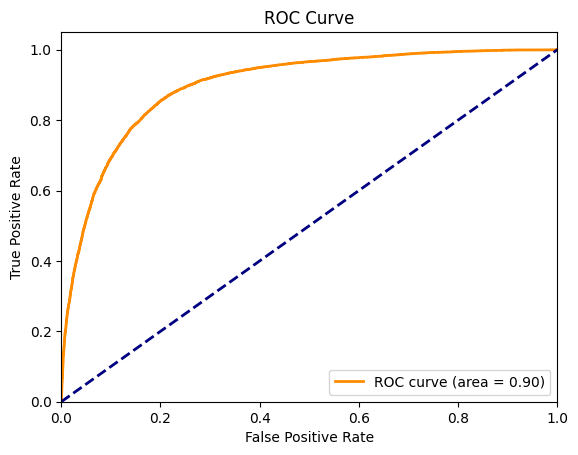

In [15]:
# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC-ROC
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# SMOTE-ENN  with selected columns

In [16]:
# Define the minority classes for each column
minority_classes = {
    'applicant_sex': [2, 3, 6, 4],
    'co_applicant_sex': [2, 1, 6],
    'applicant_race_1': [3.0],
    'co_applicant_race_1': [3.0],
    'applicant_race_2': [3.0],
    'co_applicant_race_2': [3.0],
    'applicant_ethnicity_1': [1.0],
    'co_applicant_ethnicity_1': [1.0],
}

# Create a dictionary to store resampled datasets for each column
resampled_datasets = {}

# Iterate through the columns and apply SMOTE to each
for column, minority_class in minority_classes.items():
    # Select the specific column
    selected_column = df[column].values.reshape(-1, 1)

    # Define y_min based on the minority class for this column
    y_min = [1 if value in minority_class else 0 for value in df[column]]

    # Apply SMOTE to the selected column
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled2, y_resampled2 = smote.fit_resample(selected_column, y_min)

    # Store the resampled data in the dictionary
    resampled_datasets[column] = (X_resampled2, y_resampled2)


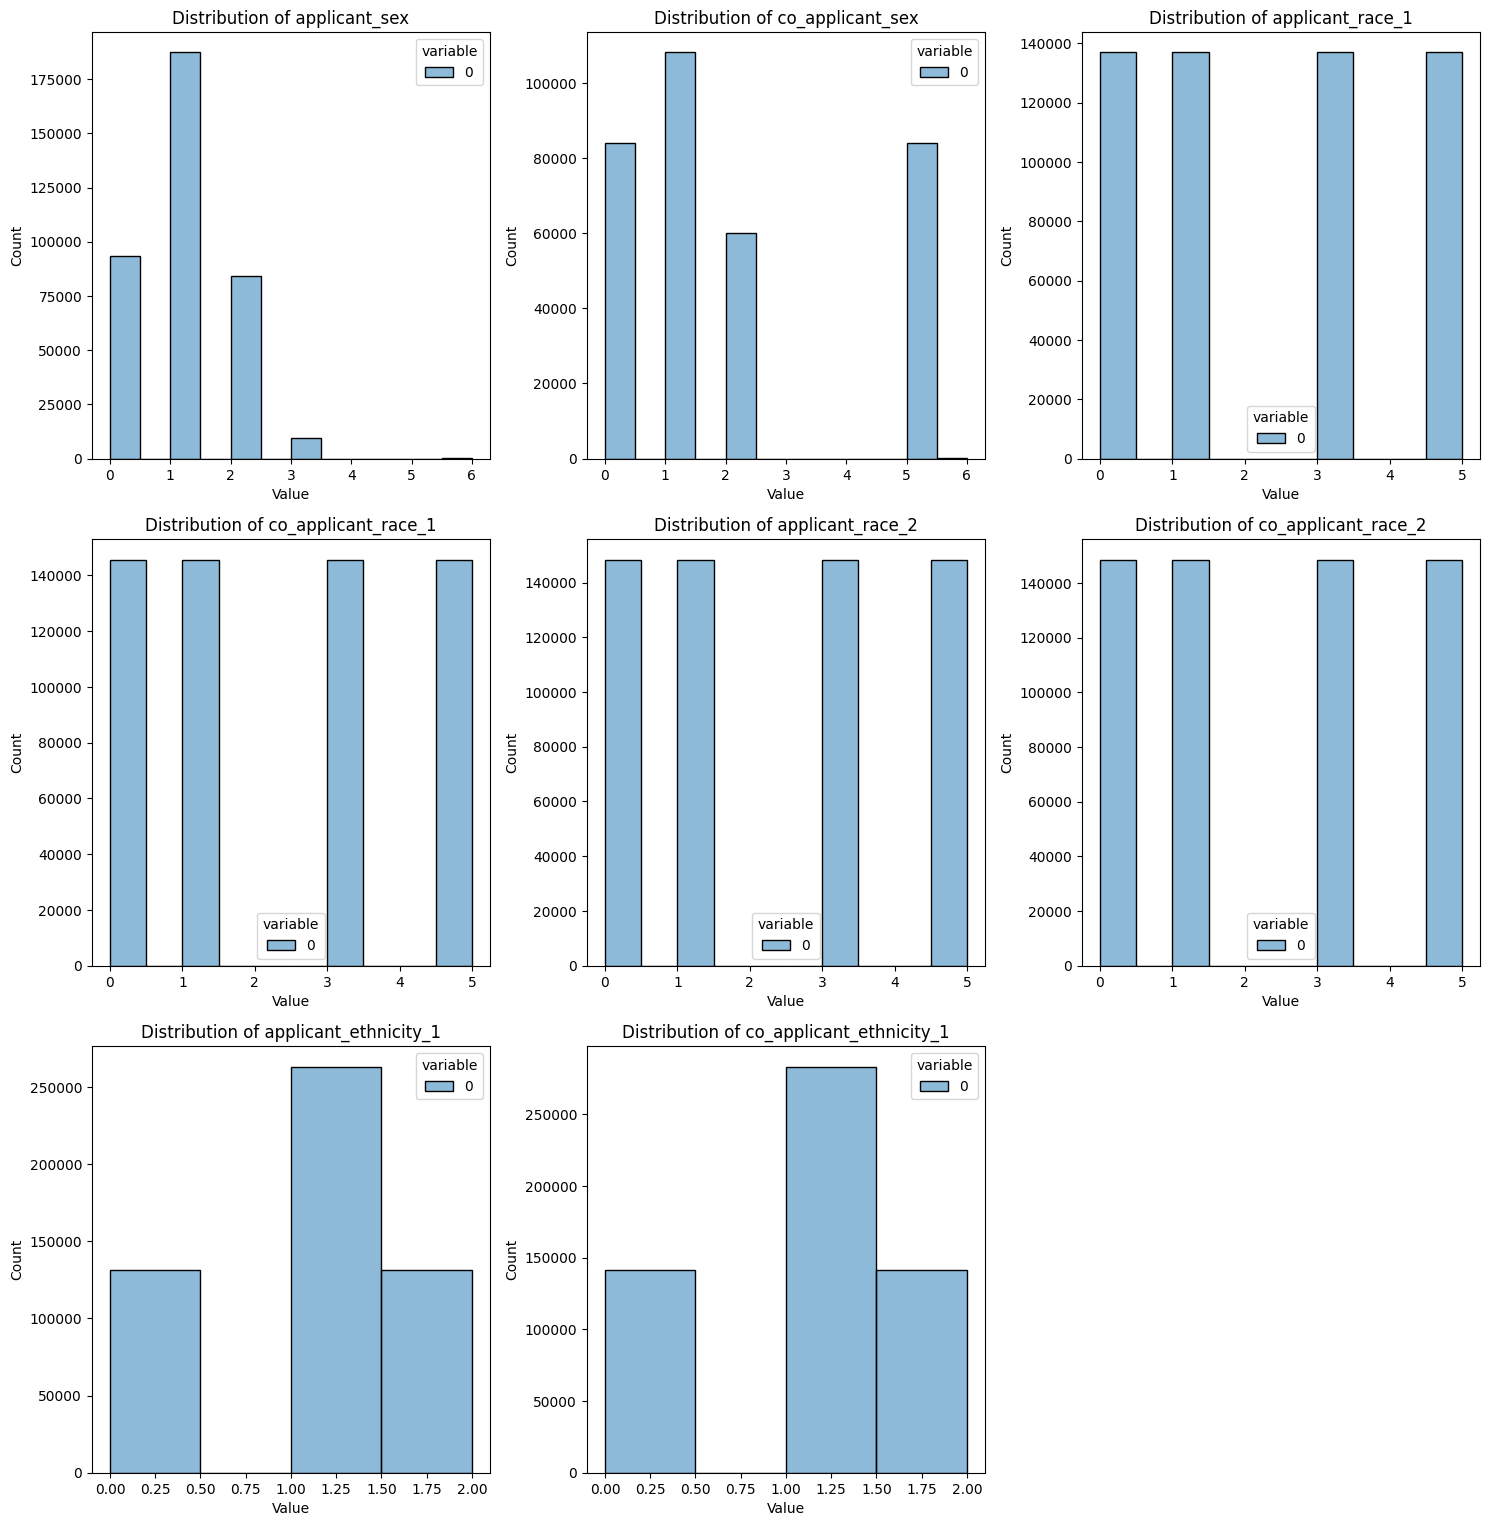

In [17]:
# Create a grid of histograms with 3 plots on every row
columns_to_plot = list(resampled_datasets.keys())

num_plots = len(columns_to_plot)
num_rows = (num_plots // 3) + (num_plots % 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    X_resampled2, y_resampled2 = resampled_datasets[column]

    merged_data = pd.concat([pd.DataFrame(X_resampled2), pd.DataFrame(y_resampled2)], axis=1)

    g = sns.histplot(data=merged_data.melt(), x='value', hue='variable', binwidth=0.5, ax=axes[i])
    g.set_title(f'Distribution of {column}')
    g.set_xlabel("Value")
    g.set_ylabel("Count")

# Hide any empty subplots
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [18]:
X_resampled2.shape

(283310, 1)

In [39]:
X_resampled2

,census_tract,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
0,0.071412,0.0,0.0,0.0,1.0,0.019858,0.0000,0.3,0.470588,0.000000,...,0.0,0.142857,0.125,0.8,1.0,1.0,1.0,1.0,1.0,1.0
1,0.733018,0.0,0.0,0.0,1.0,0.006383,0.0625,0.6,0.294118,0.571429,...,0.2,0.428571,0.375,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.071588,0.0,0.0,0.0,1.0,0.061702,0.0000,0.3,0.176471,0.285714,...,0.2,0.142857,0.125,0.8,1.0,1.0,1.0,1.0,1.0,1.0
3,0.171153,0.0,0.0,0.0,1.0,0.012411,0.0000,0.4,0.588235,0.000000,...,0.2,0.285714,0.250,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.071588,0.0,0.0,0.0,1.0,0.091844,0.3750,0.2,0.235294,0.000000,...,0.2,0.285714,0.250,0.8,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109805,0.662591,0.0,0.0,0.0,1.0,0.001418,0.3750,0.4,0.235294,0.142857,...,0.8,0.142857,0.750,1.0,1.0,1.0,1.0,1.0,0.0,1.0
109806,0.042414,0.0,0.0,0.0,1.0,0.005674,0.0000,0.4,0.235294,0.142857,...,0.8,0.285714,0.750,0.8,1.0,1.0,1.0,1.0,1.0,1.0
109807,0.648568,0.0,0.0,0.0,1.0,0.005674,0.5000,0.4,0.235294,0.142857,...,0.8,0.428571,0.750,0.8,1.0,1.0,1.0,1.0,1.0,1.0
109808,0.042520,0.0,0.0,0.0,1.0,0.007092,0.0000,0.4,0.235294,0.142857,...,0.2,0.571429,0.500,0.8,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
X_resampled2

array([[2.],
       [2.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [20]:
# Convert the list to a NumPy array
y_resampled2 = np.array(y_resampled2)

# Now you can access the shape
print(y_resampled2.shape)

(283310,)


In [21]:
y_resampled2

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Create a SMOTE-ENN instance
smote_enn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

# Fit and resample your training data
X_resampled2, y_resampled2 = smote_enn.fit_resample(X_train, y_train)

# Create a regularized logistic regression model with L2 regularization
logistic_reg_smote = LogisticRegression(penalty='l2', C=10, max_iter=10000)

# Fit the model on the resampled training data
logistic_reg_smote.fit(X_resampled2, y_resampled2)

# Make predictions on the test set
y_prob = logistic_reg_smote.predict_proba(X_test)[:, 1]

# Calculate and print the classification report
report = classification_report(y_test, (y_prob > 0.5).astype(int), zero_division=1)
print(report)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)


              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81     14332
         1.0       0.80      0.89      0.84     15393

    accuracy                           0.83     29725
   macro avg       0.83      0.82      0.82     29725
weighted avg       0.83      0.83      0.83     29725

AUC-ROC: 0.9001278694682707
Precision-Recall AUC: 0.8976912494858367


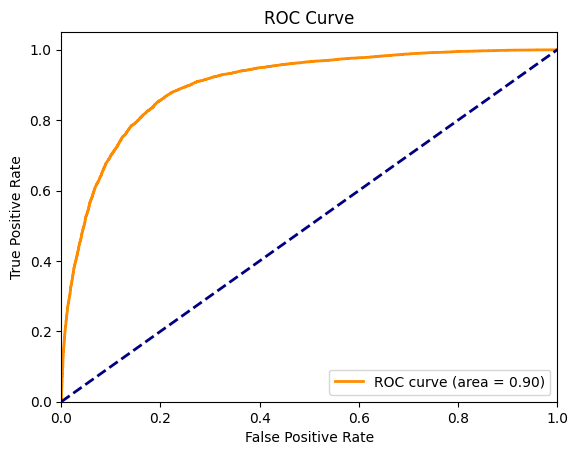

In [23]:
# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC-ROC
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search over
param_grid = {
    'penalty': ['l2', None], 
    'C': [0, 1, 10],  # Regularization strength
    'max_iter': [100,  1000, 10000]  # Maximum number of iterations
}

# Create a logistic regression model
logistic_reg = LogisticRegression()

# Create a GridSearchCV instance
grid_search = GridSearchCV(logistic_reg, param_grid, scoring='roc_auc', cv=5)

# Fit the grid search to the resampled training data
grid_search.fit(X_resampled2, y_resampled2)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate and print the classification report
report = classification_report(y_test, (y_prob > 0.5).astype(int), zero_division=1)
print(report)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)


C:\Users\asche\anaconda3\envs\Test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asche\anaconda3\envs\Test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': None}
              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81     14332
         1.0       0.80      0.89      0.84     15393

    accuracy                           0.83     29725
   macro avg       0.83      0.82      0.82     29725
weighted avg       0.83      0.83      0.83     29725

AUC-ROC: 0.9002820946536133
Precision-Recall AUC: 0.8980487518059557


Best Hyperparameters: {'C': 1000, 'max_iter': 1000, 'penalty': 'l2'} 0.87

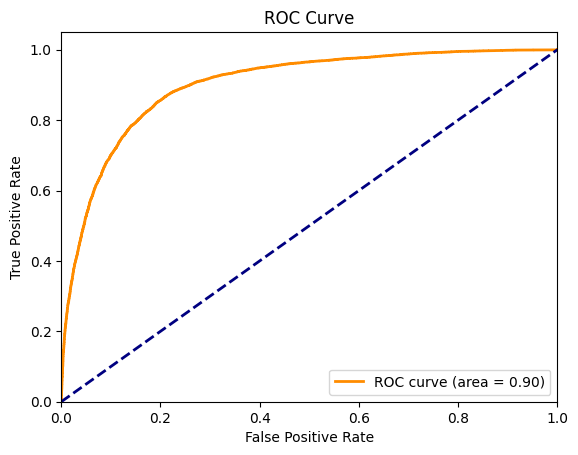

In [25]:
# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC-ROC
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Final logistic model

In [45]:
# Target variable is about equally distributed.
y_test.value_counts()

action_taken
1.0    15393
0.0    14332
Name: count, dtype: int64

In [32]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Create a SMOTE-ENN instance
smote_enn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

# Fit and resample your training data
X_resampled2, y_resampled2 = smote_enn.fit_resample(X_train, y_train)

# Create a regularized logistic regression model with L2 regularization
logistic_reg_smote = LogisticRegression(C=1, max_iter=1000, penalty='l2')

# Fit the model on the resampled training data
logistic_reg_smote.fit(X_resampled2, y_resampled2)

# Make predictions on the test set
y_prob = logistic_reg_smote.predict_proba(X_test)[:, 1]

# Calculate and print the classification report
report = classification_report(y_test, (y_prob > 0.5).astype(int), zero_division=1)
print(report)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)


              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81     14332
         1.0       0.80      0.89      0.84     15393

    accuracy                           0.83     29725
   macro avg       0.83      0.82      0.82     29725
weighted avg       0.83      0.83      0.82     29725

AUC-ROC: 0.8988962029509157
Precision-Recall AUC: 0.8948924375966545


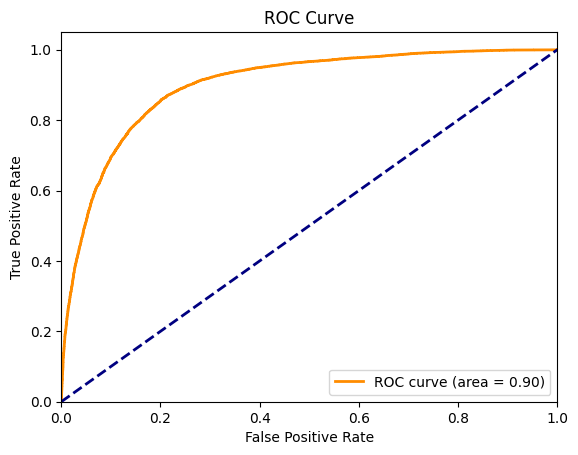

In [33]:


# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC-ROC
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

